In [1]:
import numpy as np
import pandas as pd
from scratch import *

Linear Regression
Training loss after  0  iterations is  1.5811388300841898
Training loss after  500  iterations is  0.11515089871796896
Training loss after  1000  iterations is  0.11515089872154656
Training loss after  1500  iterations is  0.11515089872154524
Training loss after  2000  iterations is  0.11515089872154423
Training loss after  2500  iterations is  0.11515089872154423
Training loss after  3000  iterations is  0.11515089872154423
Training loss after  3500  iterations is  0.11515089872154423
Training loss after  4000  iterations is  0.11515089872154423
Training loss after  4500  iterations is  0.11515089872154423
Predicted Values: [[2.76462962]
 [2.76462962]]
True Values: [3]
[1.5811388300841898, 1.3517062465607521, 1.1226091064098265, 0.8940885829444581, 0.666689680276224, 0.44195678091711044, 0.22658494162040946, 0.09144726050688341, 0.08933636784182054, 0.08737238529854577, 0.08584171929834634, 0.08561251056962607, 0.0889605289204263, 0.09889558761801534, 0.1107993211469

In [2]:
""" Running Linear Regression on Alabone dataset """

' Running Linear Regression on Alabone dataset '

In [3]:
dataset = pd.read_csv("LR_dataset/abalone/Dataset.data",sep="\s+", 
                 skiprows=1,  usecols=[0,1,2,3,4,5,6,7,8], 
                 names=['sex','length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings' ])

In [4]:
dataset.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [5]:
dataset = dataset.sample(frac = 1)
dataset.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
3133,M,0.460,0.360,0.125,0.5470,0.2165,0.1105,0.1900,8
1183,I,0.665,0.500,0.170,1.2975,0.6035,0.2910,0.3595,9
903,I,0.315,0.230,0.070,0.1440,0.0530,0.0305,0.0400,8
3602,I,0.420,0.325,0.110,0.3250,0.1245,0.0755,0.1025,7
3832,M,0.535,0.410,0.150,0.8105,0.3450,0.1870,0.2400,11


In [6]:
train_columns = ['sex','length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']
test_columns = ['rings']
X = np.array(dataset[train_columns])
Y = np.array(dataset[test_columns])

print(X)
print(Y)
print(X.shape)
print(Y.shape)

[['M' 0.46 0.36 ... 0.2165 0.1105 0.19]
 ['I' 0.665 0.5 ... 0.6035 0.29100000000000004 0.3595]
 ['I' 0.315 0.23 ... 0.053 0.0305 0.04]
 ...
 ['M' 0.51 0.415 ... 0.3295 0.1835 0.203]
 ['I' 0.315 0.235 ... 0.051 0.027999999999999997 0.0405]
 ['M' 0.625 0.48 ... 0.5870000000000001 0.29 0.28600000000000003]]
[[8]
 [9]
 [8]
 ...
 [8]
 [4]
 [8]]
(4176, 8)
(4176, 1)


In [7]:
def preprocess_dataset(X):
    """
    Preprocess the dataset, converts the 'sex' column numerical and normalise the dataset

    Parameters
    ----------
    X : 2-dimensional numpy array of shape (n_samples, n_features) which is data.
        
    Returns
    -------
    X : Preprocessed X
    """
    m = X.shape[0]
    for i in range(m):
        if(X[i,0] == 'M'):
            X[i,0] = 1  #if M then 1
        elif(X[i,0] == 'F'):
            X[i,0] = 2  #if F then 2
        elif(X[i,0] == 'I'):
            X[i,0] = 3
    X = X.T
#     print(X.shape)
    for i in range(X.shape[0]):
        mean = X[i, :].mean()
        std =  X[i, :].std()
        X[i,:] = (X[i,:] - mean)/std
    
    return X.T
    

In [8]:
X = preprocess_dataset(X)
print(X.shape)
print(X)
print(Y)

(4176, 8)
[[-1.1546687266282756 -0.5330135596337994 -0.48259430161908173 ...
  -0.6438286380721691 -0.6396713484821926 -0.3509596047971373]
 [1.2617164411991755 1.1740655579543162 0.9281606297470583 ...
  1.0997826895151899 1.007116347849223 0.8667488455844288]
 [1.2617164411991755 -1.7404597647571007 -1.7925810236019257 ...
  -1.380470633060627 -1.3695495518423768 -1.4285777024799393]
 ...
 [-1.1546687266282756 -0.11665279924645419 0.07163084998904459 ...
  -0.13471215223916758 0.02634251208397528 -0.2575660363312944]
 [1.2617164411991755 -1.7404597647571007 -1.7421969189102782 ...
  -1.3894815443143083 -1.3923582456973826 -1.4249856421543299]
 [-1.1546687266282756 0.8409769496444398 0.7266242109804667 ...
  1.0254426716723182 0.9979928703072203 0.3387159777198562]]
[[8]
 [9]
 [8]
 ...
 [8]
 [4]
 [8]]


In [9]:
def k_fold_cross_validation(X, y, k=5, loss = "rmse", epochs = 5000, learning_rate = 0.01):
    """ Performs K fold cross validation
    Parameters
    ----------
    model : instance of the model to be used
    X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as data.
    y : 1-dimensional numpy array of shape (n_samples,) which acts as labels.
    k : number of folds, default = 5
    
    Returns
    -------
    model : instance of model
    """
    m = X.shape[0]  #number of examples
    fold_size = int(m/k)
    start = 0
    end = fold_size
    models = {}
    for i in range(k):
        Xtrain_i = np.concatenate((X[0:start], X[end+1:]))
        ytrain_i = np.concatenate((y[0:start],y[end+1:]))
        X_test =  X[start:end]
        y_test = y[start:end]
        model = MyLinearRegression()
        model.fit(Xtrain_i,ytrain_i,X_test,y_test,epochs,learning_rate, loss)
        if(loss == "rmse"):
            models[i] = (model.rmse_train_history[-1], model.rmse_val_history[-1], model.rmse_train_history, model.rmse_val_history )
        if(loss == "mae"):
            models[i] = (model.mae_train_history[-1], model.mae_val_history[-1], model.mae_train_history, model.mae_val_history )
#         y_pred = model.predict(X_test)
#         rmse_val = np.sum(((y_test - y_pred)**2)**0.5)/len(y_pred)
#         mae_val = np.sum(np.abs(y_test - y_pred)/len(y_pred))
#         rmse_train_history.append(model.get_rmse_loss())
#         mae_train_history.append(model.get_mae_loss())
#         rmse_val_history.append(rmse_val)
#         mae_val_history.append(mae_val)
#         print(Xtrain_i.shape,ytrain_i.shape,X_test.shape,y_test.shape)
        print(model.W)
        print(model.b)
        start+=fold_size
        end+=fold_size
        
    
    return models
    

In [10]:
models_mae = k_fold_cross_validation(X,Y, learning_rate = 0.01, loss = "mae")


Training loss after  0  iterations is :  9.942814371257485  | validation loss is :  9.881024425039724
Training loss after  500  iterations is :  4.996682913471503  | validation loss is :  4.927330130541579
Training loss after  1000  iterations is :  1.8569355604154911  | validation loss is :  1.7749732419074797
Training loss after  1500  iterations is :  1.703033667412735  | validation loss is :  1.638218807981784
Training loss after  2000  iterations is :  1.6550305875573121  | validation loss is :  1.5937075824910403
Training loss after  2500  iterations is :  1.6310820341093066  | validation loss is :  1.565851326562298
Training loss after  3000  iterations is :  1.6157774926937571  | validation loss is :  1.5462778256811078
Training loss after  3500  iterations is :  1.6047408502866125  | validation loss is :  1.5314472868390951
Training loss after  4000  iterations is :  1.5973736575619024  | validation loss is :  1.5214678710051481
Training loss after  4500  iterations is :  1.59

In [11]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


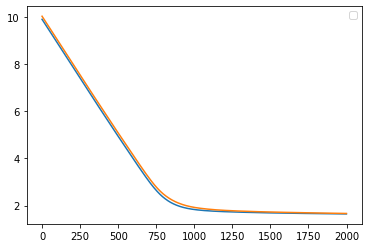

In [12]:
plt.plot([x for x in range(2000)], models_mae[1][2][0:2000])
plt.plot([x for x in range(2000)], models_mae[1][3][0:2000])

plt.legend()
plt.show()

In [13]:
models = k_fold_cross_validation(X,Y)

Training loss after  0  iterations is :  10.454019654951285  | validation loss is :  10.384868367266398
Training loss after  500  iterations is :  5.865757478020266  | validation loss is :  5.741731961803564
Training loss after  1000  iterations is :  2.916107049770006  | validation loss is :  2.7840466497947545
Training loss after  1500  iterations is :  2.416413169578189  | validation loss is :  2.30408265638736
Training loss after  2000  iterations is :  2.3474796046539343  | validation loss is :  2.2391006453280324
Training loss after  2500  iterations is :  2.3106393106811844  | validation loss is :  2.2028211391553874
Training loss after  3000  iterations is :  2.2878651321390735  | validation loss is :  2.1809497169927887
Training loss after  3500  iterations is :  2.2735308097705627  | validation loss is :  2.167837575276413
Training loss after  4000  iterations is :  2.2643163325302607  | validation loss is :  2.159919872631209
Training loss after  4500  iterations is :  2.258

No handles with labels found to put in legend.


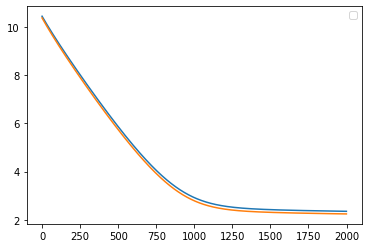

In [14]:
plt.plot([x for x in range(2000)], models[0][2][0:2000])
plt.plot([x for x in range(2000)], models[0][3][0:2000])

plt.legend()
plt.show()

In [15]:
print(models_mae)

{0: (1.5883363027505588, 1.509304102394479, [9.942814371257485, 9.932812670295531, 9.922810969333588, 9.912809268371618, 9.902807567409651, 9.89280586644771, 9.882804165485755, 9.872802464523767, 9.862800763561822, 9.852799062599873, 9.842797361637912, 9.832795660675947, 9.822793959714007, 9.812792258752049, 9.802790557790106, 9.79278885682815, 9.782787155866155, 9.772785454904225, 9.762783753942264, 9.752782052980313, 9.74278035201834, 9.732778651056373, 9.722776950094442, 9.712775249132442, 9.702773548170514, 9.692771847208551, 9.682770146246616, 9.672768445284605, 9.66276674432268, 9.652765043360736, 9.64276334239875, 9.632761641436833, 9.622759940474864, 9.612758239512887, 9.602756538550937, 9.592754837588975, 9.582753136627014, 9.572751435665072, 9.5627497347031, 9.552748033741166, 9.542746332779203, 9.532744631817222, 9.5227429308553, 9.512741229893294, 9.502739528931368, 9.492737827969432, 9.482736127007483, 9.4727344260455, 9.46273272508351, 9.452731024121572, 9.442729323159632

In [16]:
print(models)

{0: (2.254009796376822, 2.152044206747141, [10.454019654951285, 10.443003275783667, 10.432005461067357, 10.42102605318052, 10.410064895671502, 10.399121833254698, 10.388196711806803, 10.377289378362518, 10.36639968111069, 10.355527469389989, 10.344672593684786, 10.33383490562089, 10.323014257961262, 10.312210504601586, 10.301423500565956, 10.290653102002373, 10.279899166178279, 10.269161551475944, 10.258440117387982, 10.247734724512707, 10.237045234549408, 10.226371510293697, 10.215713415632772, 10.205070815540637, 10.19444357607325, 10.183831564363704, 10.173234648617452, 10.16265269810716, 10.152085583167997, 10.141533175192603, 10.130995346626, 10.120471970960656, 10.109962922731407, 10.09946807751044, 10.088987311902091, 10.078520503537794, 10.068067531070955, 10.057628274171691, 10.047202613521762, 10.03679043080932, 10.026391608723657, 10.016006030950074, 10.005633582164457, 9.995274148028217, 9.984927615182878, 9.974593871244762, 9.964272804799773, 9.95396430539808, 9.9436682635

In [17]:
print("Stats for LR MAE Loss")
for i in range(len(models_mae)):
    print("For CV number ",i, "the train loss = ", models_mae[i][0], " and the val loss = ", models_mae[i][1] )
print("Stats for LR RMSE Loss")
for i in range(len(models)):
    print("For CV number ",i, "the train loss = ", models[i][0], " and the val loss = ", models[i][1] )

Stats for LR MAE Loss
For CV number  0 the train loss =  1.5883363027505588  and the val loss =  1.509304102394479
For CV number  1 the train loss =  1.5716411611272048  and the val loss =  1.5765771340737318
For CV number  2 the train loss =  1.5382757759278478  and the val loss =  1.6985252419078052
For CV number  3 the train loss =  1.5883090911234412  and the val loss =  1.502243871503042
For CV number  4 the train loss =  1.564395939974294  and the val loss =  1.5927620215430347
Stats for LR RMSE Loss
For CV number  0 the train loss =  2.254009796376822  and the val loss =  2.152044206747141
For CV number  1 the train loss =  2.2501913083770235  and the val loss =  2.1828204708745167
For CV number  2 the train loss =  2.1991159979109938  and the val loss =  2.3747171766327178
For CV number  3 the train loss =  2.241388817068954  and the val loss =  2.3094580387686063
For CV number  4 the train loss =  2.2107924885881447  and the val loss =  2.320335308773635


In [18]:
""" In both the cases we notice that FOLD 0 intern gives us the best validation loss, so we choose that as the best fold"""

' In both the cases we notice that FOLD 0 intern gives us the best validation loss, so we choose that as the best fold'

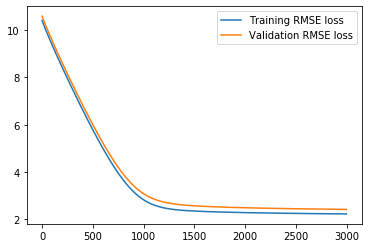

In [19]:
plt.plot([x for x in range(3000)], models[2][2][0:3000], label = "Training RMSE loss " )
plt.plot([x for x in range(3000)], models[2][3][0:3000], label = "Validation RMSE loss")

plt.legend()
plt.show()

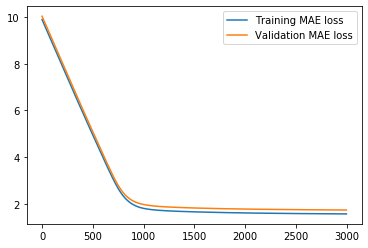

In [20]:
plt.plot([x for x in range(3000)], models_mae[2][2][0:3000], label = "Training MAE loss " )
plt.plot([x for x in range(3000)], models_mae[2][3][0:3000], label = "Validation MAE loss")

plt.legend()
plt.show()

In [21]:
dataset = pd.read_csv("LR_dataset/VideoGameDataset - Video_Games_Sales_as_at_22_Dec_2016.csv",  usecols=['Critic_Score','Global_Sales','User_Score'])

In [22]:
dataset.head()

,Global_Sales,Critic_Score,User_Score
0,82.53,76.0,8
1,40.24,NaN,NaN
2,35.52,82.0,8.3
3,32.77,80.0,8
4,31.37,NaN,NaN


In [23]:
dataset.isna().sum()

Global_Sales       0
Critic_Score    8582
User_Score      6704
dtype: int64

In [24]:
mean_critic_score = dataset["Critic_Score"].mean()
print("mean_critic_score", mean_critic_score)
dataset['User_Score'].value_counts()

mean_critic_score 68.96767850559173


tbd    2425
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.6       2
1.3       2
0.9       2
9.7       1
0         1
Name: User_Score, Length: 96, dtype: int64

In [25]:
dataset["Critic_Score"] = dataset["Critic_Score"].fillna(mean_critic_score)
dataset.head()
# dataset['User_Score'].replace(to_replace = 'tbd', value = np.nan,inplace=True)
dataset = dataset.drop(dataset[dataset.User_Score == "tbd"].index)
dataset["User_Score"] = pd.to_numeric(dataset["User_Score"], downcast="float")
mean_user_score = dataset["User_Score"].mean()
dataset["User_Score"] = dataset["User_Score"].fillna(mean_user_score)
print("mean_user_score", mean_user_score)
dataset['User_Score'].value_counts()


mean_user_score 7.125075817108154


7.125076    6704
7.800000     324
8.000000     290
8.200000     282
8.300000     254
            ... 
1.500000       2
0.500000       2
1.000000       2
9.700000       1
0.000000       1
Name: User_Score, Length: 96, dtype: int64

In [26]:
dataset.head()

,Global_Sales,Critic_Score,User_Score
0,82.53,76.000000,8.000000
1,40.24,68.967679,7.125076
2,35.52,82.000000,8.300000
3,32.77,80.000000,8.000000
4,31.37,68.967679,7.125076


In [27]:
train_columns = ["Global_Sales", "Critic_Score"]
X = np.array(dataset[train_columns])
Y = np.array(dataset["User_Score"])
Y = Y.reshape((Y.shape[0],1))
X = (X - X.mean())/X.std()
print(X)
print(Y)
print(X.shape)
print(Y.shape)

[[ 1.34744957  1.16196728]
 [ 0.14621745  0.96221674]
 [ 0.01214756  1.33239511]
 ...
 [-0.99650112  0.96221674]
 [-0.99650112  0.96221674]
 [-0.99650112  0.96221674]]
[[8.      ]
 [7.125076]
 [8.3     ]
 ...
 [7.125076]
 [7.125076]
 [7.125076]]
(14294, 2)
(14294, 1)


In [28]:
video_game_model = k_fold_cross_validation(X,Y)

Training loss after  0  iterations is :  7.150232399294235  | validation loss is :  7.40641849237749
Training loss after  500  iterations is :  0.9106340432042906  | validation loss is :  0.9793775916362144
Training loss after  1000  iterations is :  0.9105364591322763  | validation loss is :  0.9789091250476648
Training loss after  1500  iterations is :  0.9104782701523648  | validation loss is :  0.9785708746185291
Training loss after  2000  iterations is :  0.9104435683807672  | validation loss is :  0.9783263114167604
Training loss after  2500  iterations is :  0.9104228728555432  | validation loss is :  0.9781471208808175
Training loss after  3000  iterations is :  0.9104105289226786  | validation loss is :  0.978014247921557
Training loss after  3500  iterations is :  0.9104031645534291  | validation loss is :  0.9779146570729885
Training loss after  4000  iterations is :  0.9103987691013508  | validation loss is :  0.9778392848333821
Training loss after  4500  iterations is :  0

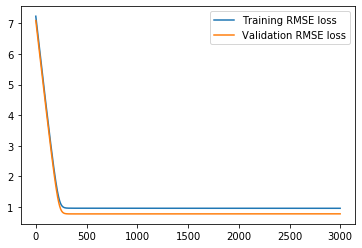

In [29]:
plt.plot([x for x in range(3000)], video_game_model[4][2][0:3000], label = "Training RMSE loss " )
plt.plot([x for x in range(3000)], video_game_model[4][3][0:3000], label = "Validation RMSE loss")

plt.legend()
plt.show()

In [30]:
video_game_model = k_fold_cross_validation(X,Y, learning_rate = 0.1,loss = "mae")

Training loss after  0  iterations is :  7.067419418740804  | validation loss is :  7.05605734317891
Training loss after  500  iterations is :  0.5225198619603854  | validation loss is :  0.6346151090045703
Training loss after  1000  iterations is :  0.4779263696109984  | validation loss is :  0.6122702490763777
Training loss after  1500  iterations is :  0.5098658292504142  | validation loss is :  0.6036232515119765
Training loss after  2000  iterations is :  0.5360090980595456  | validation loss is :  0.6251108662887818
Training loss after  2500  iterations is :  0.4774612430987048  | validation loss is :  0.6462396734431762
Training loss after  3000  iterations is :  0.49159830670443466  | validation loss is :  0.607615447964464
Training loss after  3500  iterations is :  0.47654541510924847  | validation loss is :  0.6392102166048101
Training loss after  4000  iterations is :  0.5253778957605771  | validation loss is :  0.631130529418195
Training loss after  4500  iterations is :  

E:\sem5\MachineLearning\Machine-Learning-Assignments\Assignment1\scratch.py:132: RuntimeWarning: invalid value encountered in true_divide
  dW = (-1/m)*(np.sum(np.dot(X.T,abs(error)/error), axis = 1))
E:\sem5\MachineLearning\Machine-Learning-Assignments\Assignment1\scratch.py:133: RuntimeWarning: invalid value encountered in true_divide
  db = (-1/m)*(np.sum(abs(error)/error))


Training loss after  500  iterations is :  nan  | validation loss is :  nan
Training loss after  1000  iterations is :  nan  | validation loss is :  nan
Training loss after  1500  iterations is :  nan  | validation loss is :  nan
Training loss after  2000  iterations is :  nan  | validation loss is :  nan
Training loss after  2500  iterations is :  nan  | validation loss is :  nan
Training loss after  3000  iterations is :  nan  | validation loss is :  nan
Training loss after  3500  iterations is :  nan  | validation loss is :  nan
Training loss after  4000  iterations is :  nan  | validation loss is :  nan
Training loss after  4500  iterations is :  nan  | validation loss is :  nan
[[nan]
 [nan]]
nan
Training loss after  0  iterations is :  7.147900229932233  | validation loss is :  nan
Training loss after  500  iterations is :  nan  | validation loss is :  nan
Training loss after  1000  iterations is :  nan  | validation loss is :  nan
Training loss after  1500  iterations is :  nan 